## Evaluation of a model

The **evaluation** of a model is one of the most important steps in the Machine Learning process, since it will let us know how good our model is, how much it has learned from the training sample (`train`) and how it will perform for never-before-seen or new data (`test` and/or `validation`).

To evaluate a model, there are certain sets of metrics that are distinguished according to whether a model allows classification or regression.

### Metrics for classification models

The **evaluation** of a model is one of the most important steps in the Machine Learning process, as it allows us to know how good our model is, how much it has learned from the training sample (`train`), and how it will perform on never-before-seen or new data (`test` and/or `validation`).

To evaluate a model, there are certain sets of metrics that are distinguished according to whether a model allows classification or regression.

## Metrics for classification models

When we build a classification model, the first impulse is to ask: **how well does it get it right?**  

The quick answer is usually *accuracy*. But relying solely on it can be a dangerous trap, especially in problems where the consequences of being wrong are not the same.  

### The confusion matrix: the starting point

Before talking about metrics, we need a fundamental tool: the **confusion matrix**. In it, we compare what the model predicted against reality:  

| Actual \ Predicted | Positive | Negative |
|--------------------|----------|----------|
| **Positive (40)**  | **TP = 35** | **FN = 5** |
| **Negative (60)**  | **FP = 5**  | **TN = 55** |

Example (COVID diagnosis in 100 patients):  
- 40 truly sick → 35 detected (TP), 5 not detected (FN).  
- 60 healthy → 55 correctly classified (TN), 5 misclassified (FP).  

With this basis, all the metrics we will see below arise.  

### Accuracy

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

In the example:  
$$
Accuracy = \frac{35 + 55}{100} = 90\%
$$

Accuracy measures the percentage of overall correct predictions. In our example, the model gets 90 out of 100 cases right: 90% accuracy.

Sounds good, right? The problem is that it can be misleading with **imbalanced** data: if 95% of the population is healthy, a model that always says “healthy” would have 95% accuracy… even if it never detects a single sick person.

### Recall (Sensitivity)

$$
Recall = \frac{TP}{TP + FN}
$$

In the example:  
$$
Recall = \frac{35}{35 + 5} = 87.5\%
$$

Recall measures how many actual positives the model detects. In the example: 35 out of 40 sick people were identified → 87.5% recall.

A low recall means that **positive cases are missed**. In healthcare, that means sick patients go undiagnosed: an unacceptable error.

### Specificity

$$
Specificity = \frac{TN}{TN + FP}
$$

In the example:  
$$
Specificity = \frac{55}{55 + 5} = 91.6\%
$$

Specificity measures how many **actual negatives** are correctly recognized. In the example: 55 out of 60 healthy people were correctly classified → 91.6% specificity.

A low value here means many **false positives**. In judicial contexts, it would mean convicting innocent people: a serious error, even if recall is high.

### F1 Score

The **F1** combines precision and recall, but uses the **harmonic mean**, not the arithmetic mean. This prevents a very high value from compensating for a very low one.  

$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

Example:  
- Precision = 80%  
- Recall = 60%  
- F1 ≈ 68.6%  

If it were an arithmetic mean, it would be 70%. F1 lowers it to 68.6, penalizing imbalance. A good model should balance both dimensions.

### AUC – Area Under the ROC Curve

The AUC metric measures the model’s ability to distinguish between positives and negatives as the decision thresholds vary.

- An AUC of 1.0 means the model perfectly separates both classes.
- An AUC of 0.5 means it distinguishes nothing, equivalent to flipping a coin.

In practice, a model with AUC 0.95 ranks cases from “most suspicious” to “least suspicious” very well, even if we later choose different thresholds to classify.

#### Schematic example of ROC curve


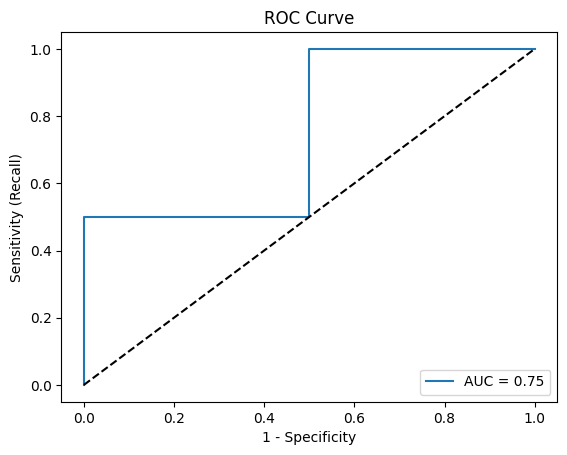

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example with fictitious data
y_true = [0, 0, 1, 1]
y_scores = [0.1, 0.4, 0.35, 0.8]

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

> The ROC curve does not depend on a single cutoff point, but rather shows how the model behaves for all possible thresholds. This makes the AUC a global metric, and it does not depend on choosing an arbitrary value for classification.

### Not all metrics matter equally: it depends on the context

Here’s the key: **we don’t always seek to optimize the same metric**. The context defines which error is more costly:

- **In healthcare (COVID, cancer, HIV):** Prioritize **sensitivity**. It’s better to detect all sick individuals (even if there are false positives) than to leave someone undiagnosed.
- **In justice (guilty/innocent):** Prioritize **specificity**. It’s preferable for some guilty people to go undetected than to convict an innocent person.
- **In financial credit:** Seek **balance**.
    - False negative: lending money to someone who won’t pay → financial loss.
    - False positive: rejecting a customer who would have paid → lost opportunity. Here, metrics like **F1 or AUC** are used, or even custom cost functions.

### Metrics for Regression Models

A **regression model** is used to predict a continuous value. Typical examples include:  

- Estimating the price of a house based on its size, number of rooms, and location.  
- Predicting the electricity demand of a city based on the time of day and temperature.  
- Estimating product sales for the next week.  

In these cases, the output variable is **numeric and continuous**, and we need ways to measure **how close the predictions are to the actual values**.

### Mean Absolute Error (MAE)

MAE measures how much a model is wrong on average when making predictions. Instead of just checking if a prediction was correct or not, it calculates how far it was from the actual answer.

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

It measures the average of the absolute differences between the actual values and the predictions.  

Example:  
- Actual values: [100, 200, 300]  
- Predictions: [110, 190, 295]  

For each data point, we calculate the absolute error:

- For the first: (100 – 110) = 10
- For the second: (200 – 190) = 10
- For the third: (300 – 295) = 5

**Absolute errors = [10, 10, 5]**

**MAE = (10 + 10 + 5)/3 = 8.3**  

That **8.3** means that, on average, the model is off by 8.3 units from the actual value. If we are predicting house prices in dollars, it is off by 8.3 dollars. If it were temperatures in °C, it is off by 8.3 °C. That’s why MAE is measured in the same units as the target variable. 


### Mean Squared Error (MSE)

**MSE** also measures how much a model is wrong on average, just like MAE. The difference is that, instead of taking the absolute errors, it squares them before averaging. That means:

- Small errors become even smaller (because 2² = 4).
- Large errors become much larger (because 20² = 400).

In other words, MSE penalizes large errors much more than small ones.

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

In the example:  

- Actual values: [100, 200, 300]
- Predictions: [110, 190, 295] 

**Absolute errors (as in MAE): [10, 10, 5]**. Now we square each error:

- 10² = 100
- 10² = 100
- 5² = 25

**MSE = (100 + 100 + 25)/3 = 75** 

That 75 represents the average of the squared errors. **Important:** since the errors are squared, the result is no longer in the same units as the original variable. If the value was dollars, now it’s dollars² (not very intuitive). If it was degrees °C, now it’s °C². That’s why RMSE (the square root of MSE) is often used, to “return” to the original units.


### Root Mean Squared Error (RMSE)

$$
RMSE = \sqrt{MSE}
$$

It is simply the square root of the MSE.  In the example:  

RMSE = √75 ≈ **8.66**  
 
- It is expressed in the same units as the variable (dollars, meters, etc.).  
- Easier to interpret than MSE, but still sensitive to large errors.  

### Coefficient of Determination ($R^2$)

Measures what proportion of the variability in the data is explained by the model.  

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$


Example:  
- If $R^2 = 0.90$, it means the model explains 90% of the variation in the target variable.  
- If $R^2 = 0$, the model does no better than always using the mean.  
- If $R^2 < 0$, the model is worse than the mean (poor fit).  

It is useful as a global measure of fit. It is not always enough; a model can have a good $R^2$ but large errors in certain individual cases.  


### Which metric to use?

- **MAE**: when you want to interpret the error in **real units** (e.g., dollars, km, °C).  
- **MSE**: when you want to heavily penalize large errors.  
- **RMSE**: when you want something in between, expressed in real units but sensitive to large errors.  
- **$R^2$**: when you want a **global fit indicator**, easy to communicate to non-technical audiences.  

In `scikit-learn`, all these metrics can be easily calculated and the documentation is available [here](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)  